# graphs_notebook
This is a test using Jupyter notebook for our graphs in R

### First, we load in the required libraries.

In [1]:
library(dplyr)
library(data.table)
library(ggplot2)
library(viridis)
library(vegan)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: viridisLite

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-5


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Then, we read in the data from our GitHub repo and generate some tables.

In [5]:
data <- fread("FINAL_RNA/idba_tran_BLAST_nt_BOWTIE2_final.txt")
tax <- select(data, superkingdom:genus) # Right now no species are picked because the information is kind of unequally organized
spe <- select(data, counts)
tax

superkingdom kingdom       phylum          subphylum class                
1    Eukaryota    Fungi         Chytridiomycota NA        Monoblepharidomycetes
2    Eukaryota    Fungi         Chytridiomycota NA        Monoblepharidomycetes
3    Eukaryota    Viridiplantae Chlorophyta     NA        Palmophyllophyceae   
4    Eukaryota    NA            NA              NA        NA                   
5    Eukaryota    NA            NA              NA        NA                   
6    Eukaryota    NA            NA              NA        NA                   
7    Eukaryota    NA            NA              NA        NA                   
8    Eukaryota    NA            NA              NA        NA                   
9    Eukaryota    NA            NA              NA        NA                   
10   Eukaryota    NA            NA              NA        NA                   
11   Eukaryota    NA            NA              NA        NA                   
12   Eukaryota    NA            NA              NA        NA                   
13   Eukaryota    NA            Tubulinea       NA        Elardia              
14   Eukaryota    NA            Tubulinea       NA        Elardia              
15   Eukaryota    NA            Tubulinea       NA        Elardia              
16   Eukaryota    NA            Evosea          NA        Eumycetozoa          
17   Eukaryota    NA            Evosea          NA        Eumycetozoa          
18   Eukaryota    NA            Evosea          NA        Eumycetozoa          
19   Eukaryota    NA            Evosea          NA        Eumycetozoa          
20   Eukaryota    NA            Heterolobosea   NA        NA                   
21   Eukaryota    NA            Heterolobosea   NA        NA                   
22   Eukaryota    NA            Heterolobosea   NA        NA                   
23   Eukaryota    Metazoa       Nematoda        NA        Chromadorea          
24   Bacteria     NA            NA              NA        NA                   
25   Eukaryota    NA            NA              NA        NA                   
26   Eukaryota    NA            NA              NA        NA                   
27   Bacteria     NA            NA              NA        NA                   
28   Bacteria     NA            NA              NA        NA                   
29   Bacteria     NA            NA              NA        NA                   
30   Bacteria     NA            NA              NA        NA                   
⋮    ⋮            ⋮             ⋮               ⋮         ⋮                    
6749 NA           NA            NA              NA        NA                   
6750 NA           NA            NA              NA        NA                   
6751 NA           NA            NA              NA        NA                   
6752 NA           NA            NA              NA        NA                   
6753 NA           NA            NA              NA        NA                   
6754 NA           NA            NA              NA        NA                   
6755 NA           NA            NA              NA        NA                   
6756 NA           NA            NA              NA        NA                   
6757 NA           NA            NA              NA        NA                   
6758 NA           NA            NA              NA        NA                   
6759 NA           NA            NA              NA        NA                   
6760 NA           NA            NA              NA        NA                   
6761 NA           NA            NA              NA        NA                   
6762 NA           NA            NA              NA        NA                   
6763 NA           NA            NA              NA        NA                   
6764 NA           NA            NA              NA        NA                   
6765 NA           NA            NA              NA        NA                   
6766 NA           NA            NA              NA        NA                   
6767 

### Now, we create a taxlist vector with contains each phylum per row in the taxonomy table (or if phylum = NA, then superkingdom).

In [6]:
taxlastrow <- nrow(tax)
taxlist <- rep(NA,nrow(tax))
for (i in 1:nrow(tax))
{
    if (is.na(tax[i,1]) == TRUE)
      { taxlist[i] <- "NA" }
    else if (tax[i,1] == "Unknown")
      { taxlist[i] <- "Unknown" }
    else if (is.na(tax[i,3]) == TRUE)
      { taxlist[i] <- paste(tax[i,1], ": Unknown", sep="") }
    else
      { taxlist[i] <- paste(tax[i,1], ": ", tax[i,3], sep="") }
}

### We combine read count and taxonomic group information and aggregate them based on groups.

In [7]:
plot_table <- as.data.table(cbind(taxlist,spe))
plot_agg <- aggregate(unlist(plot_table[[2]])~unlist(plot_table[[1]]),data=plot_table,FUN=sum)
colnames(plot_agg) <- c("Group", "Reads")
plot_agg_ordered <- plot_agg[order(as.character(plot_agg$Group)),]
plot_agg_ordered$Group <- factor(plot_agg_ordered$Group, levels=plot_agg_ordered$Group)

### Let's also set some nice colors for plots.

In [8]:
viridis_colors <- viridis_pal(option = "D")(nrow(plot_agg_ordered)) # Choosing viridis colors (colorblindfriendly), as many colors from gradient as numbers of groups
set.seed(002) # Set seed for randomizations so that it's reproducible
colorvec1 <- sample(viridis_colors) # Randomize color order, otherwise bars next to each other are hard to distinguish
colorvec2 <- c("#023fa5", "#7d87b9", "#bec1d4", "#d6bcc0", "#bb7784", "#8e063b", "#11c638", "#8dd593", "#c6dec7", "#ead3c6", "#f0b98d", "#ef9708", "#0fcfc0", "#9cded6", "#d5eae7", "#f3e1eb", "#f6c4e1", "#f79cd4", "#4a6fe3", "#8595e1", "#b5bbe3", "#e6afb9", "#e07b91", "#d33f6a")

### Now, we can finally start plotting. First, we plot our one sample, which represents one combination of programs in our pipeline.

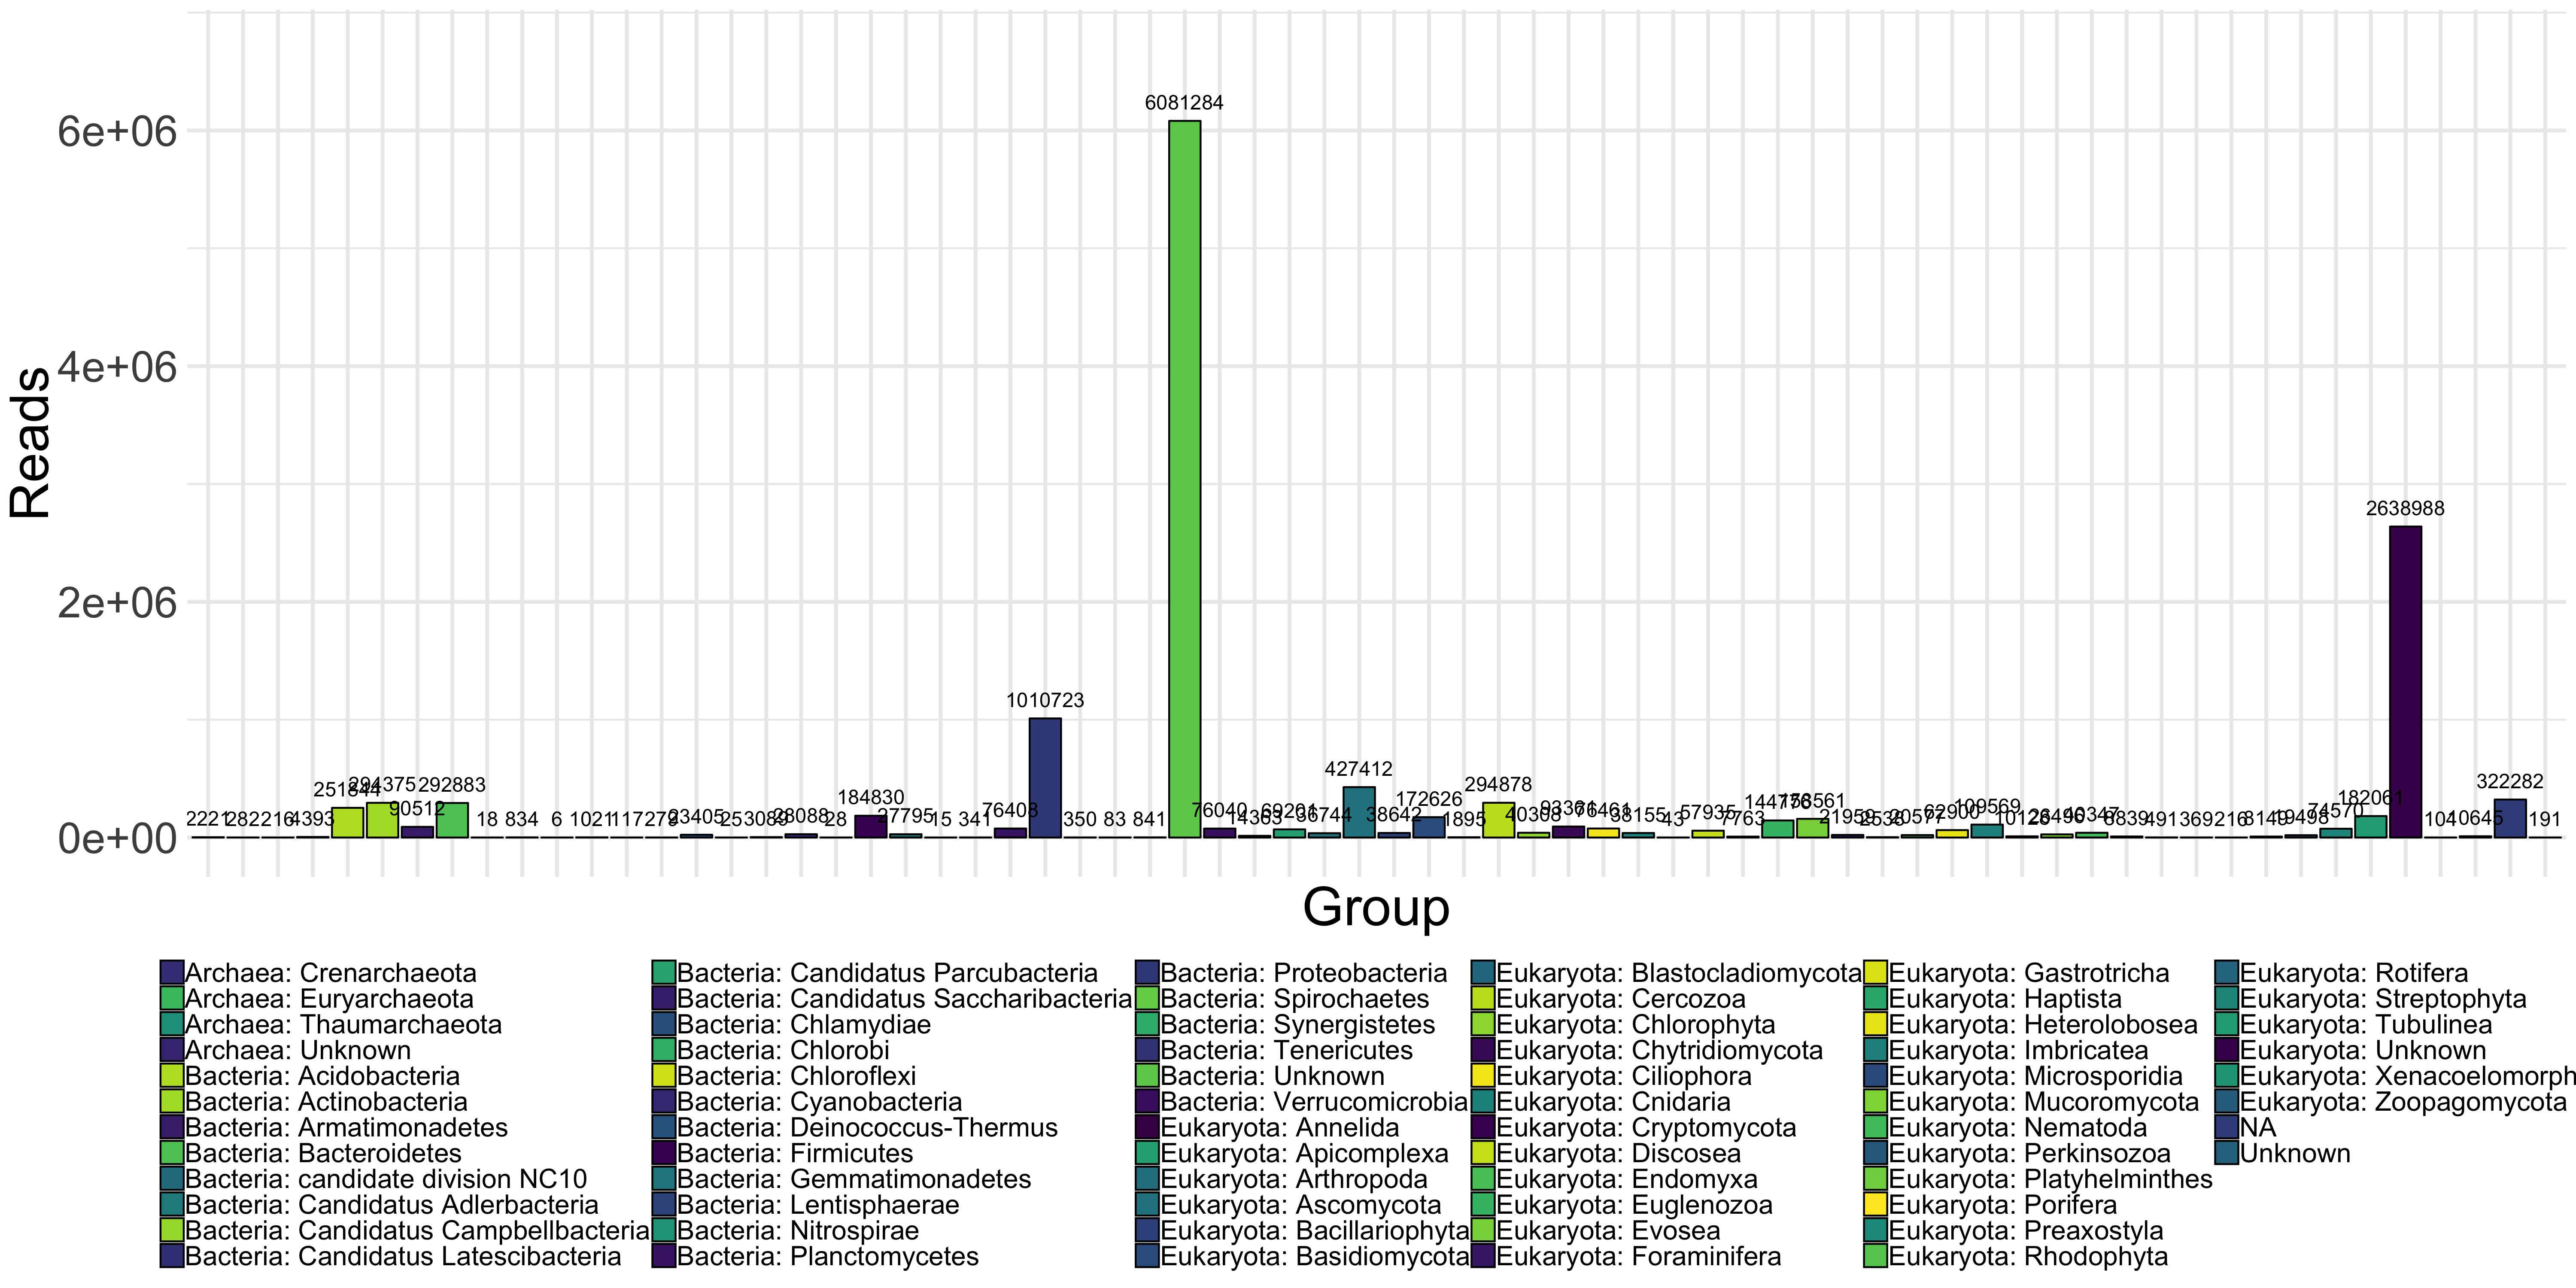

In [22]:
plot1<-ggplot(data=plot_agg_ordered, aes(x=Group, y=Reads, fill=Group))+
  geom_bar(stat="identity", color="black")+
  ylim(0,1.1*max(plot_agg_ordered$Reads))+
  theme_minimal()+
  scale_fill_manual(values=colorvec1)+
  geom_text(aes(label=Reads), vjust=-0.8, size=4)+
  theme(legend.key.size = unit(1,"line"))+
  theme(axis.text.x=element_blank())+
  theme(legend.position="bottom")+
  theme(legend.text=element_text(size=15))+
  theme(legend.title=element_blank())+
  theme(text = element_text(size = 30))+
  theme(element_line(size = 1))+
  guides(fill=guide_legend(ncol=6,byrow=FALSE))

options(repr.plot.width=20, repr.plot.height=10, repr.plot.res=300)
plot1
#ggsave("Plot.png", plot=plot1,  device="png")  #uncomment if you want to save the plot as .png (currently wrong size, rather save it manually by right-clicking o picture)

### But for our real data, we will have more than just one combination. So let's pretend we have more and create new random samples which represent data of other combinations and plot them as stacked barplots.

In [23]:
sample_2 <- round(runif(nrow(plot_agg_ordered), 0, max(plot_agg_ordered$Reads)))
sample_3 <- round(runif(nrow(plot_agg_ordered), 0, max(plot_agg_ordered$Reads)))
sample_4 <- round(runif(nrow(plot_agg_ordered), 0, max(plot_agg_ordered$Reads)))
sample_5 <- round(runif(nrow(plot_agg_ordered), 0, max(plot_agg_ordered$Reads)))
sample_6 <- round(runif(nrow(plot_agg_ordered), 0, max(plot_agg_ordered$Reads)))
test_table <- as.data.frame(cbind(plot_agg_ordered[[2]],sample_2,sample_3,sample_4,sample_5,sample_6))
test_relative <- cbind(plot_agg_ordered$Group, decostand(test_table, "total", 2))
colnames(test_relative) <- c("Group", "SPAdes: Bowtie2" ,"SPAdes: BWA" ,"IDBA-UD: Bowtie2", "IDBA-UD: BWA" ,"Megahit: Bowtie2", "Megahit: BWA")
test_stacked_plot <- melt(test_relative,id.vars = "Group", variable.name="Combination", value.name="Reads")

### We plot all samples next to each other as stacked bars.

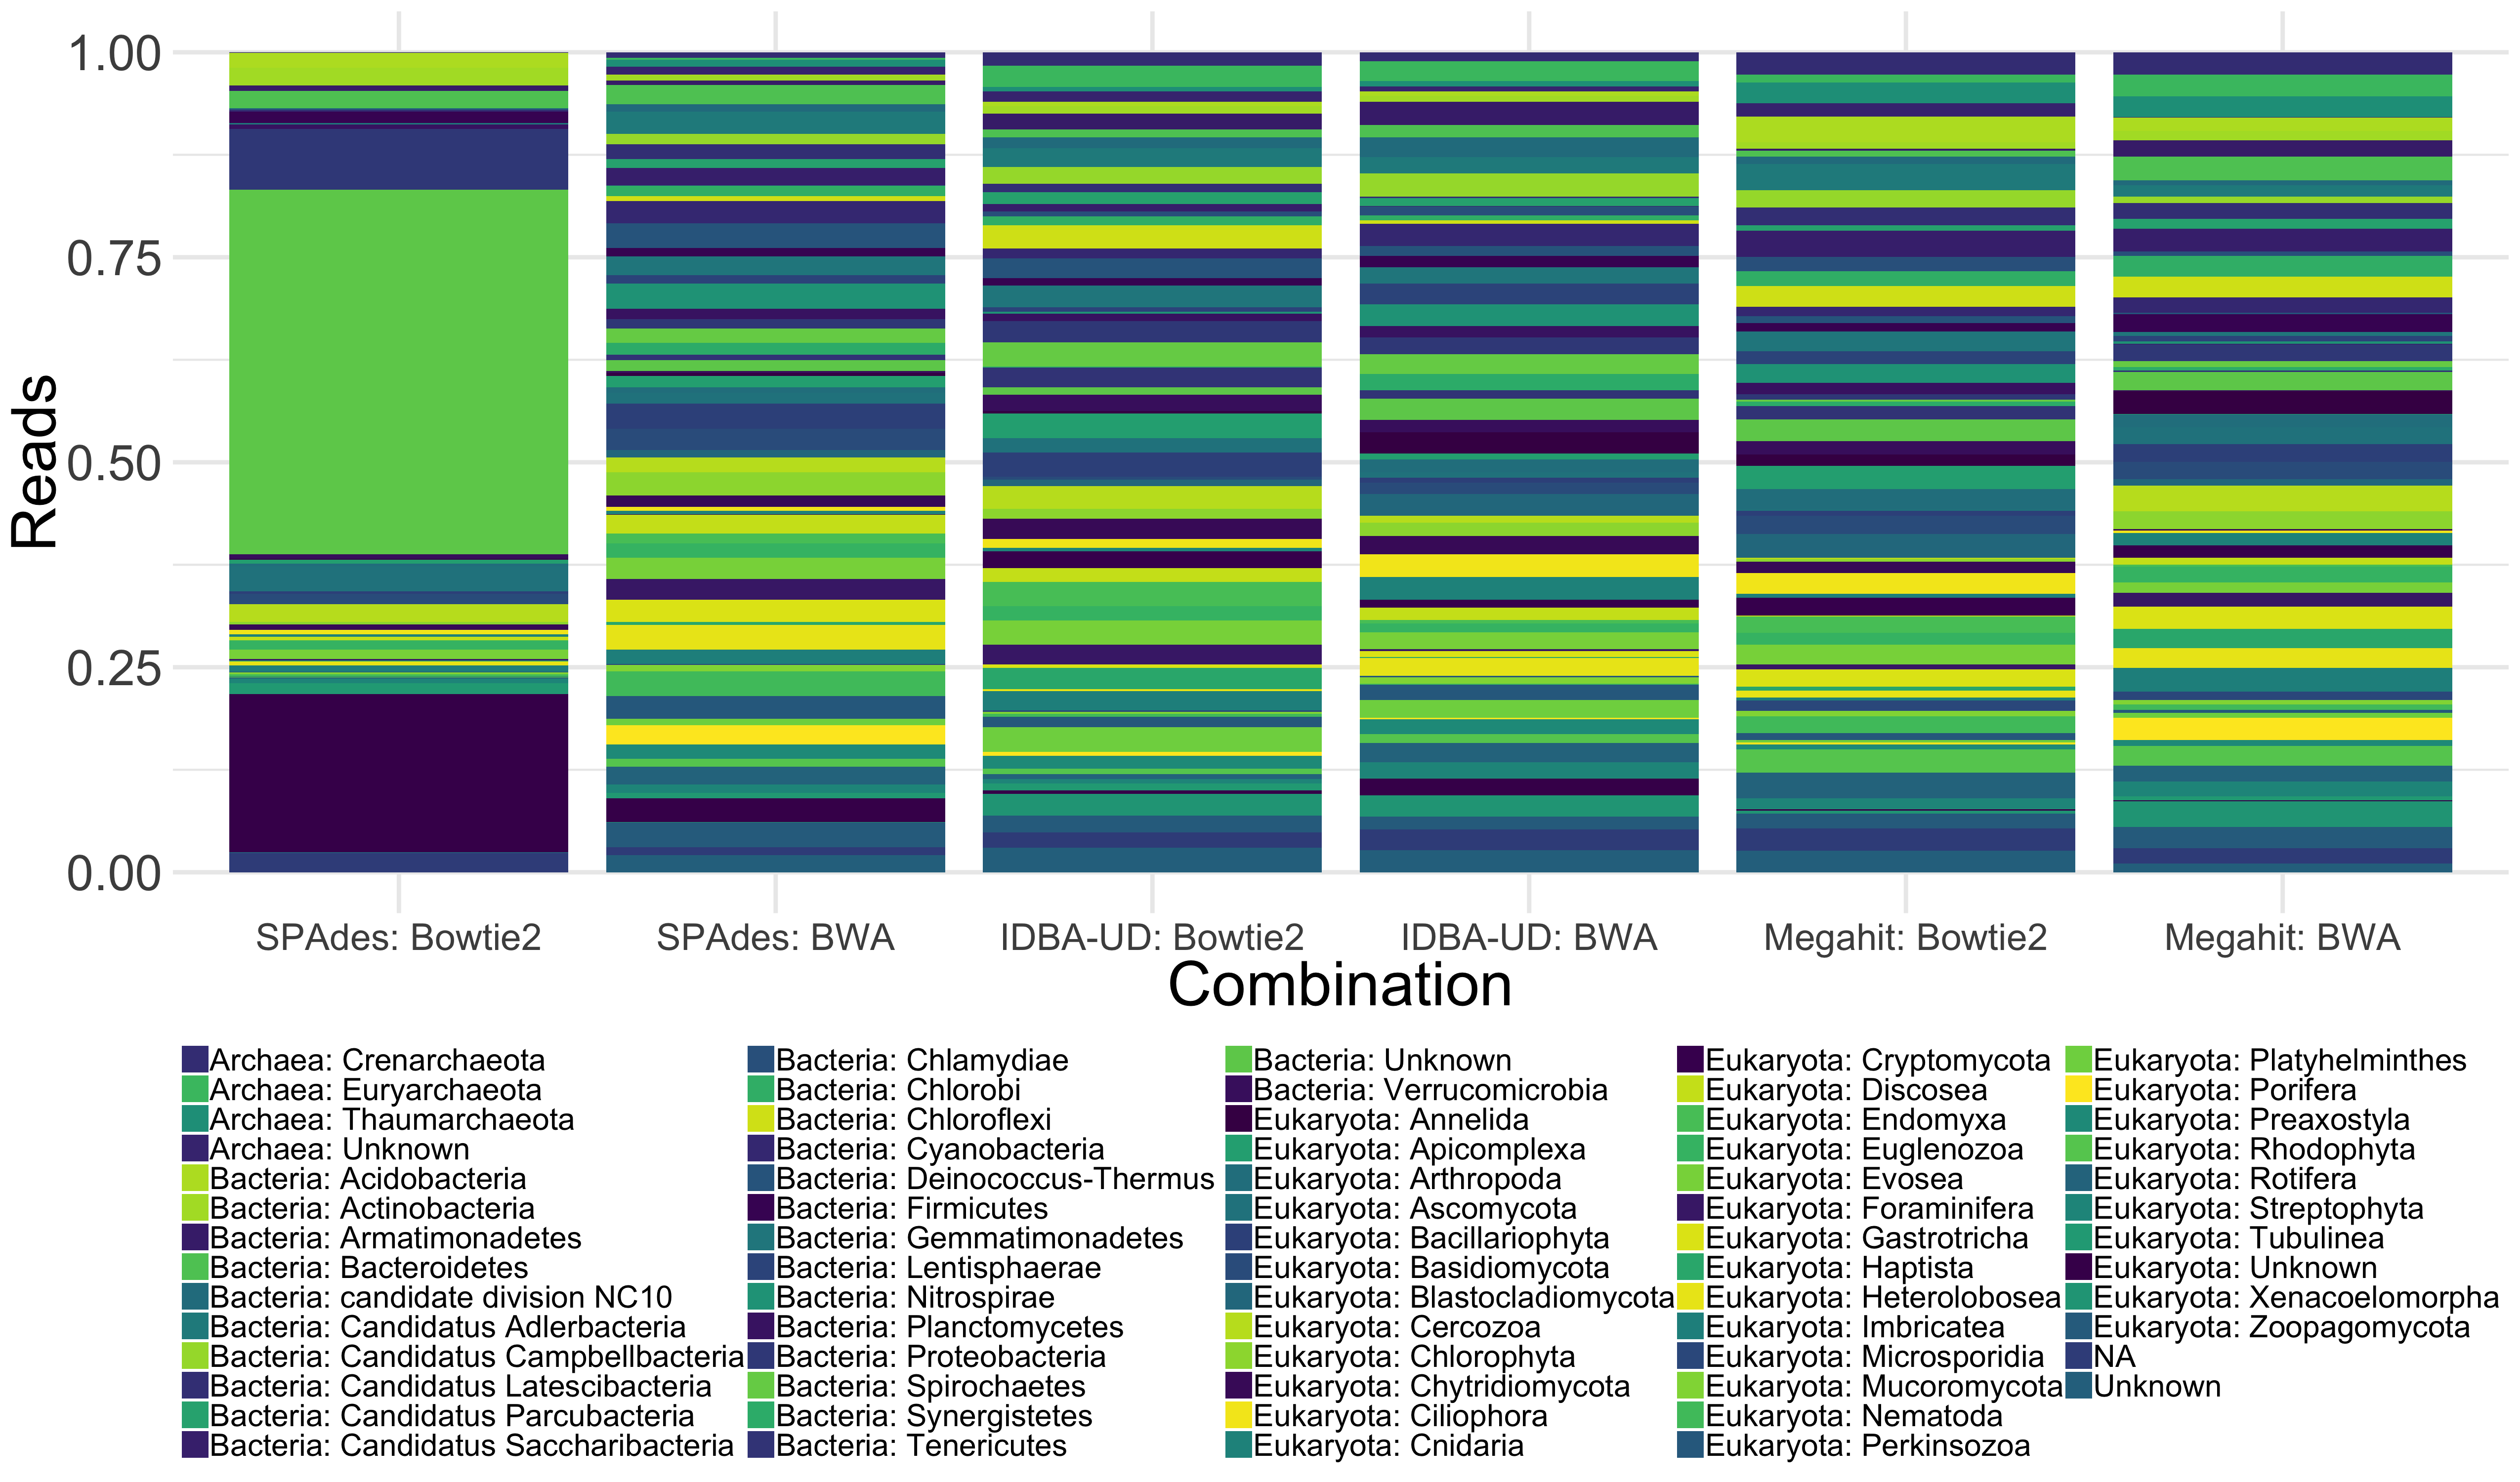

In [25]:
plot2<-ggplot(data=test_stacked_plot, aes(x=Combination, y=Reads, fill=Group))+
  geom_bar(stat="identity")+
  theme_minimal()+
  scale_fill_manual(values=colorvec1)+
  theme(legend.key.size = unit(1,"line"))+
  theme(legend.position="bottom")+
  theme(legend.text=element_text(size=15))+
  theme(axis.text.x=element_text(size=18))+
  theme(legend.title=element_blank())+
  theme(text = element_text(size = 30))+
  theme(element_line(size = 1))

options(repr.plot.width=17, repr.plot.height=10)
plot2
#ggsave("Plot2.png", plot=plot2,  device="png")  #uncomment if you want to save the plot as .png (currently wrong size, rather save it manually by right-clicking o picture)

### But actually, we have diferent groups of combinations. So we could arrange them more neat. Let's make groups for our plots to tidy them up.

In [31]:
melted <- test_stacked_plot
melted$Category <- c(rep("SPAdes", 136), rep("IDBA-UD", 136), rep("Megahit", 136))
melted$Combination <- c(rep(c(rep("Bowtie2", 68), rep("BWA", 68)), 3))

### And now let's plot these stacked bars in groups.


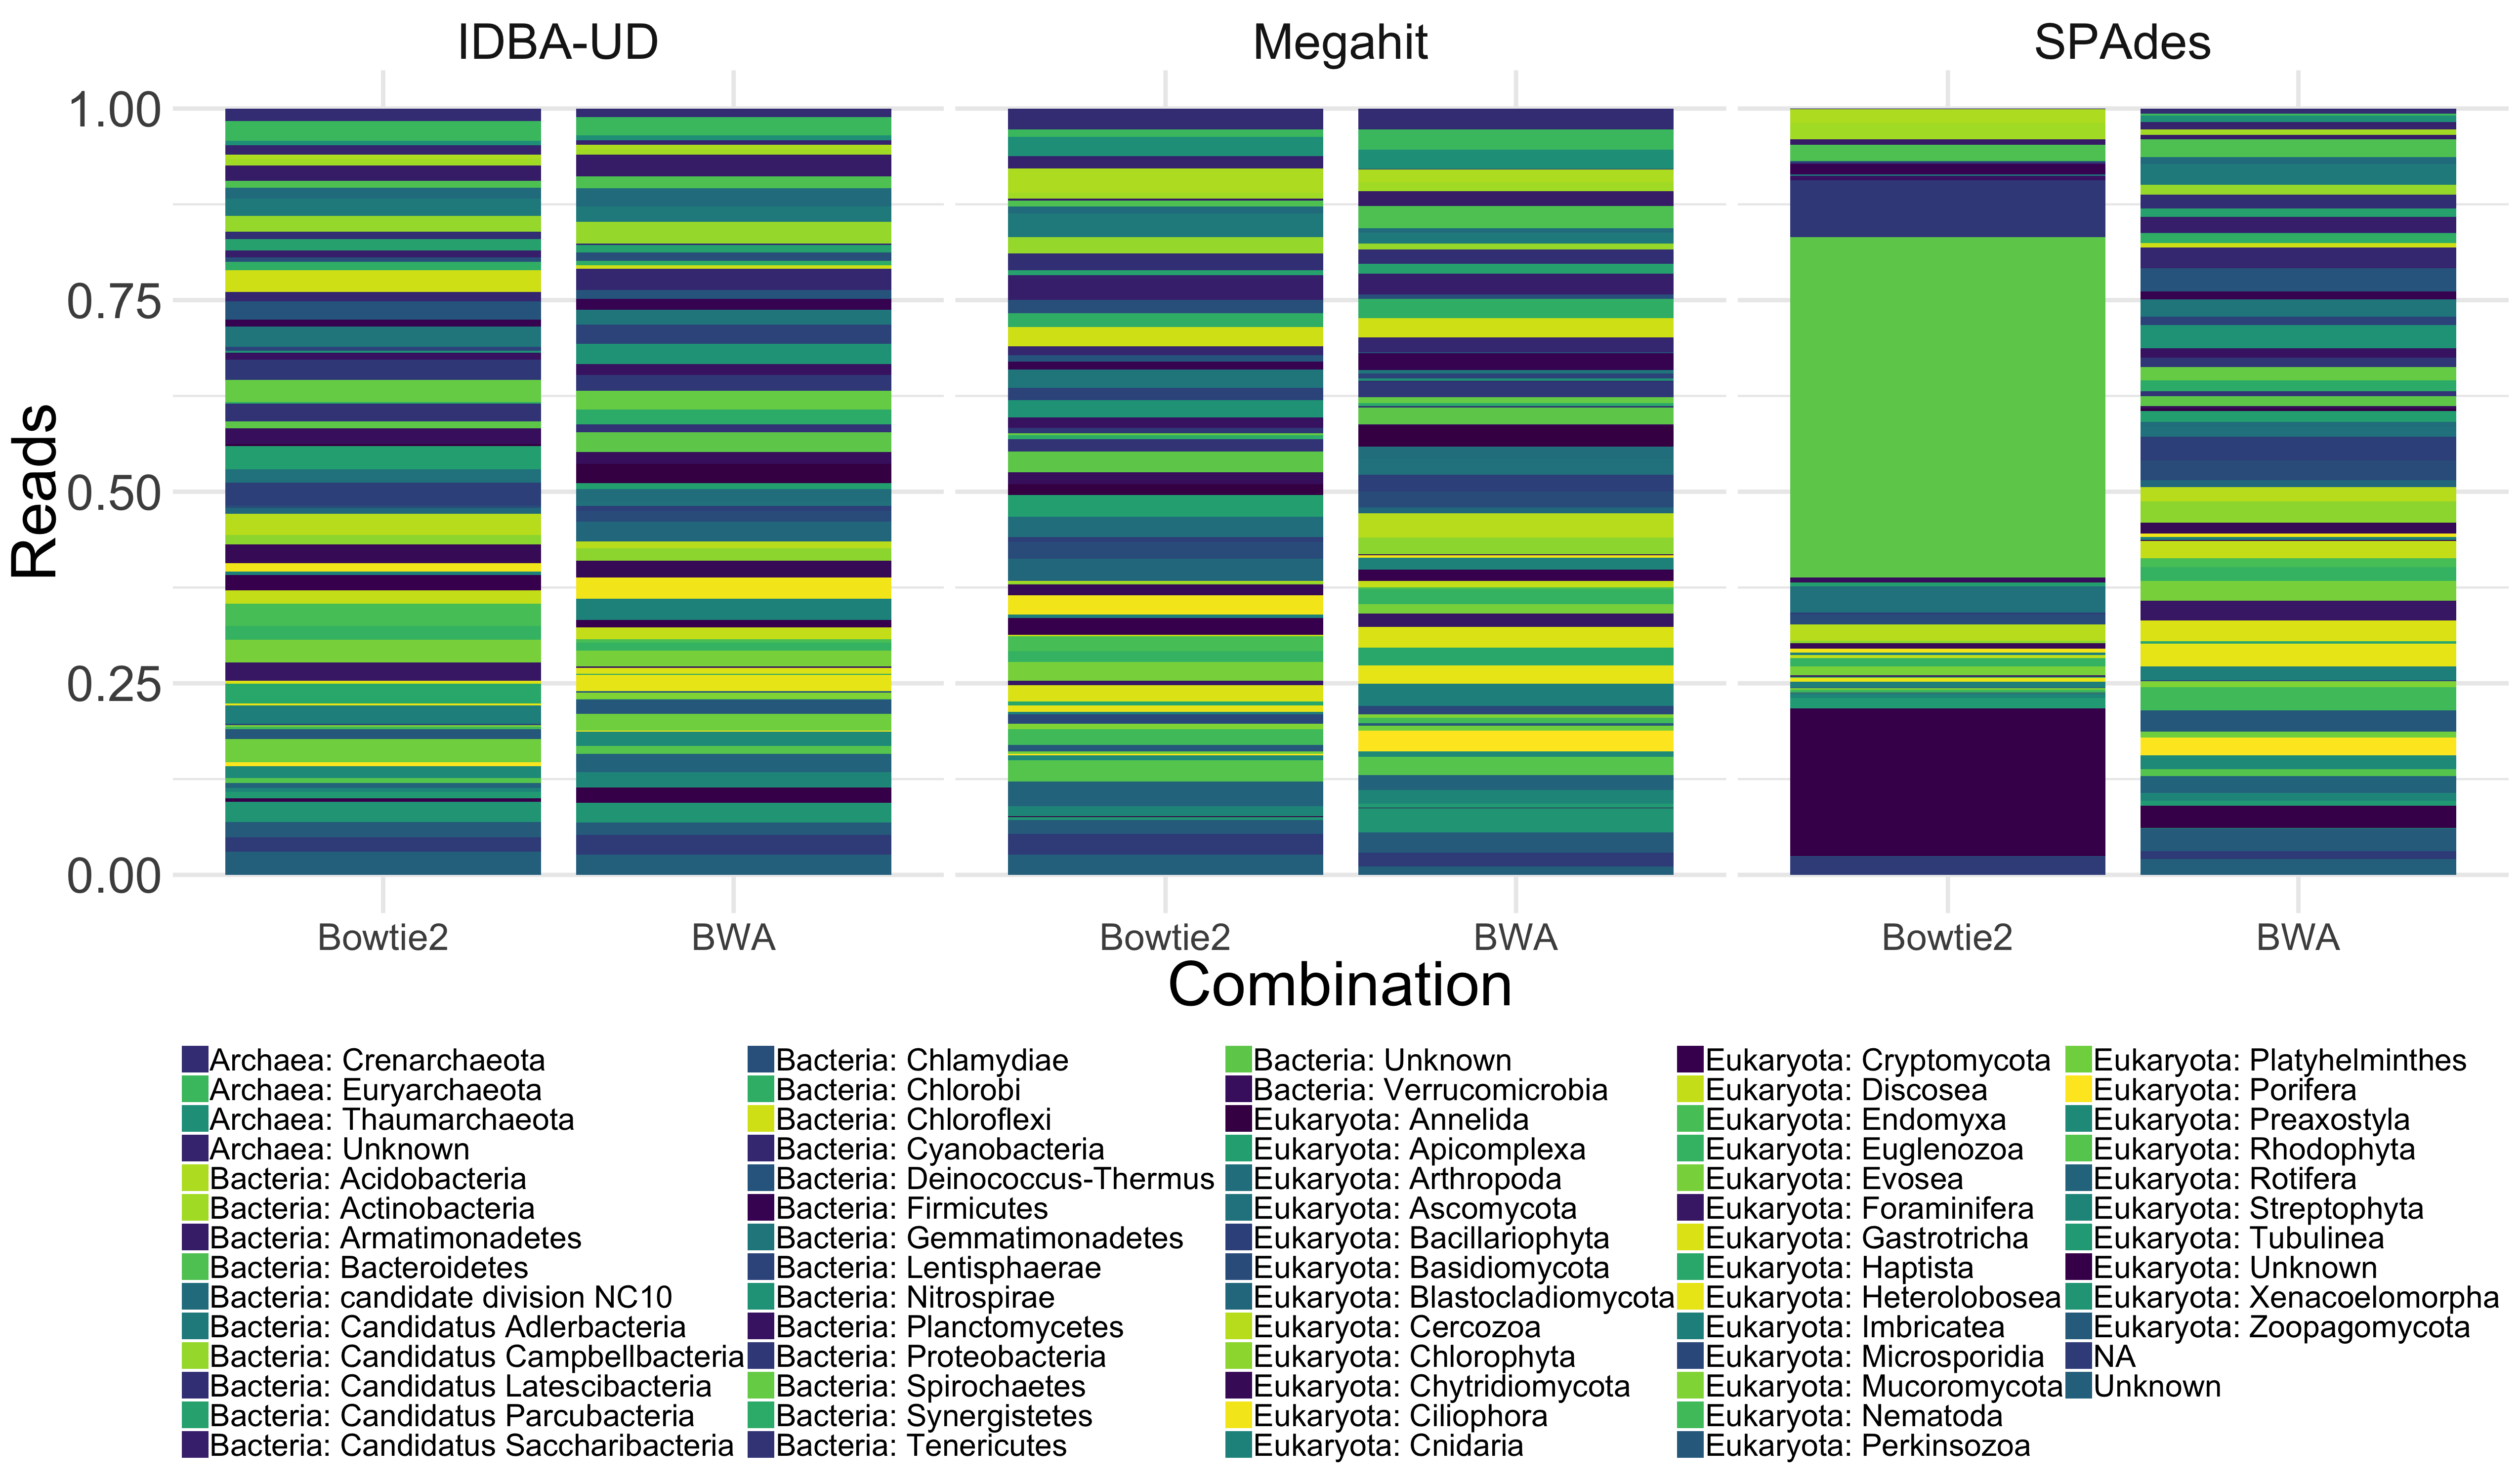

In [30]:
plot3<-ggplot(melted, aes(x = Combination, y = Reads, fill = Group))+
  geom_bar(stat = 'identity')+
  facet_grid(~ Category, scales = "free", space = "free")+
  theme_minimal()+
  scale_fill_manual(values=colorvec1)+
  theme(legend.key.size = unit(1,"line"))+
  theme(legend.position="bottom")+
  theme(legend.text=element_text(size=15))+
  theme(axis.text.x=element_text(size=18))+
  theme(legend.title=element_blank())+
  theme(text = element_text(size = 30))+
  theme(element_line(size = 1))
options(repr.plot.width=17, repr.plot.height=10)
plot3
#ggsave("Plot3.png", plot=plot3,  device="png")  #uncomment if you want to save the plot as .png (currently wrong size, rather save it manually by right-clicking o picture)

### To be honest though, the colors are a bit ugly. Let's try different colors and generate the plots next to each other to directly compare them - and pick the best colors!

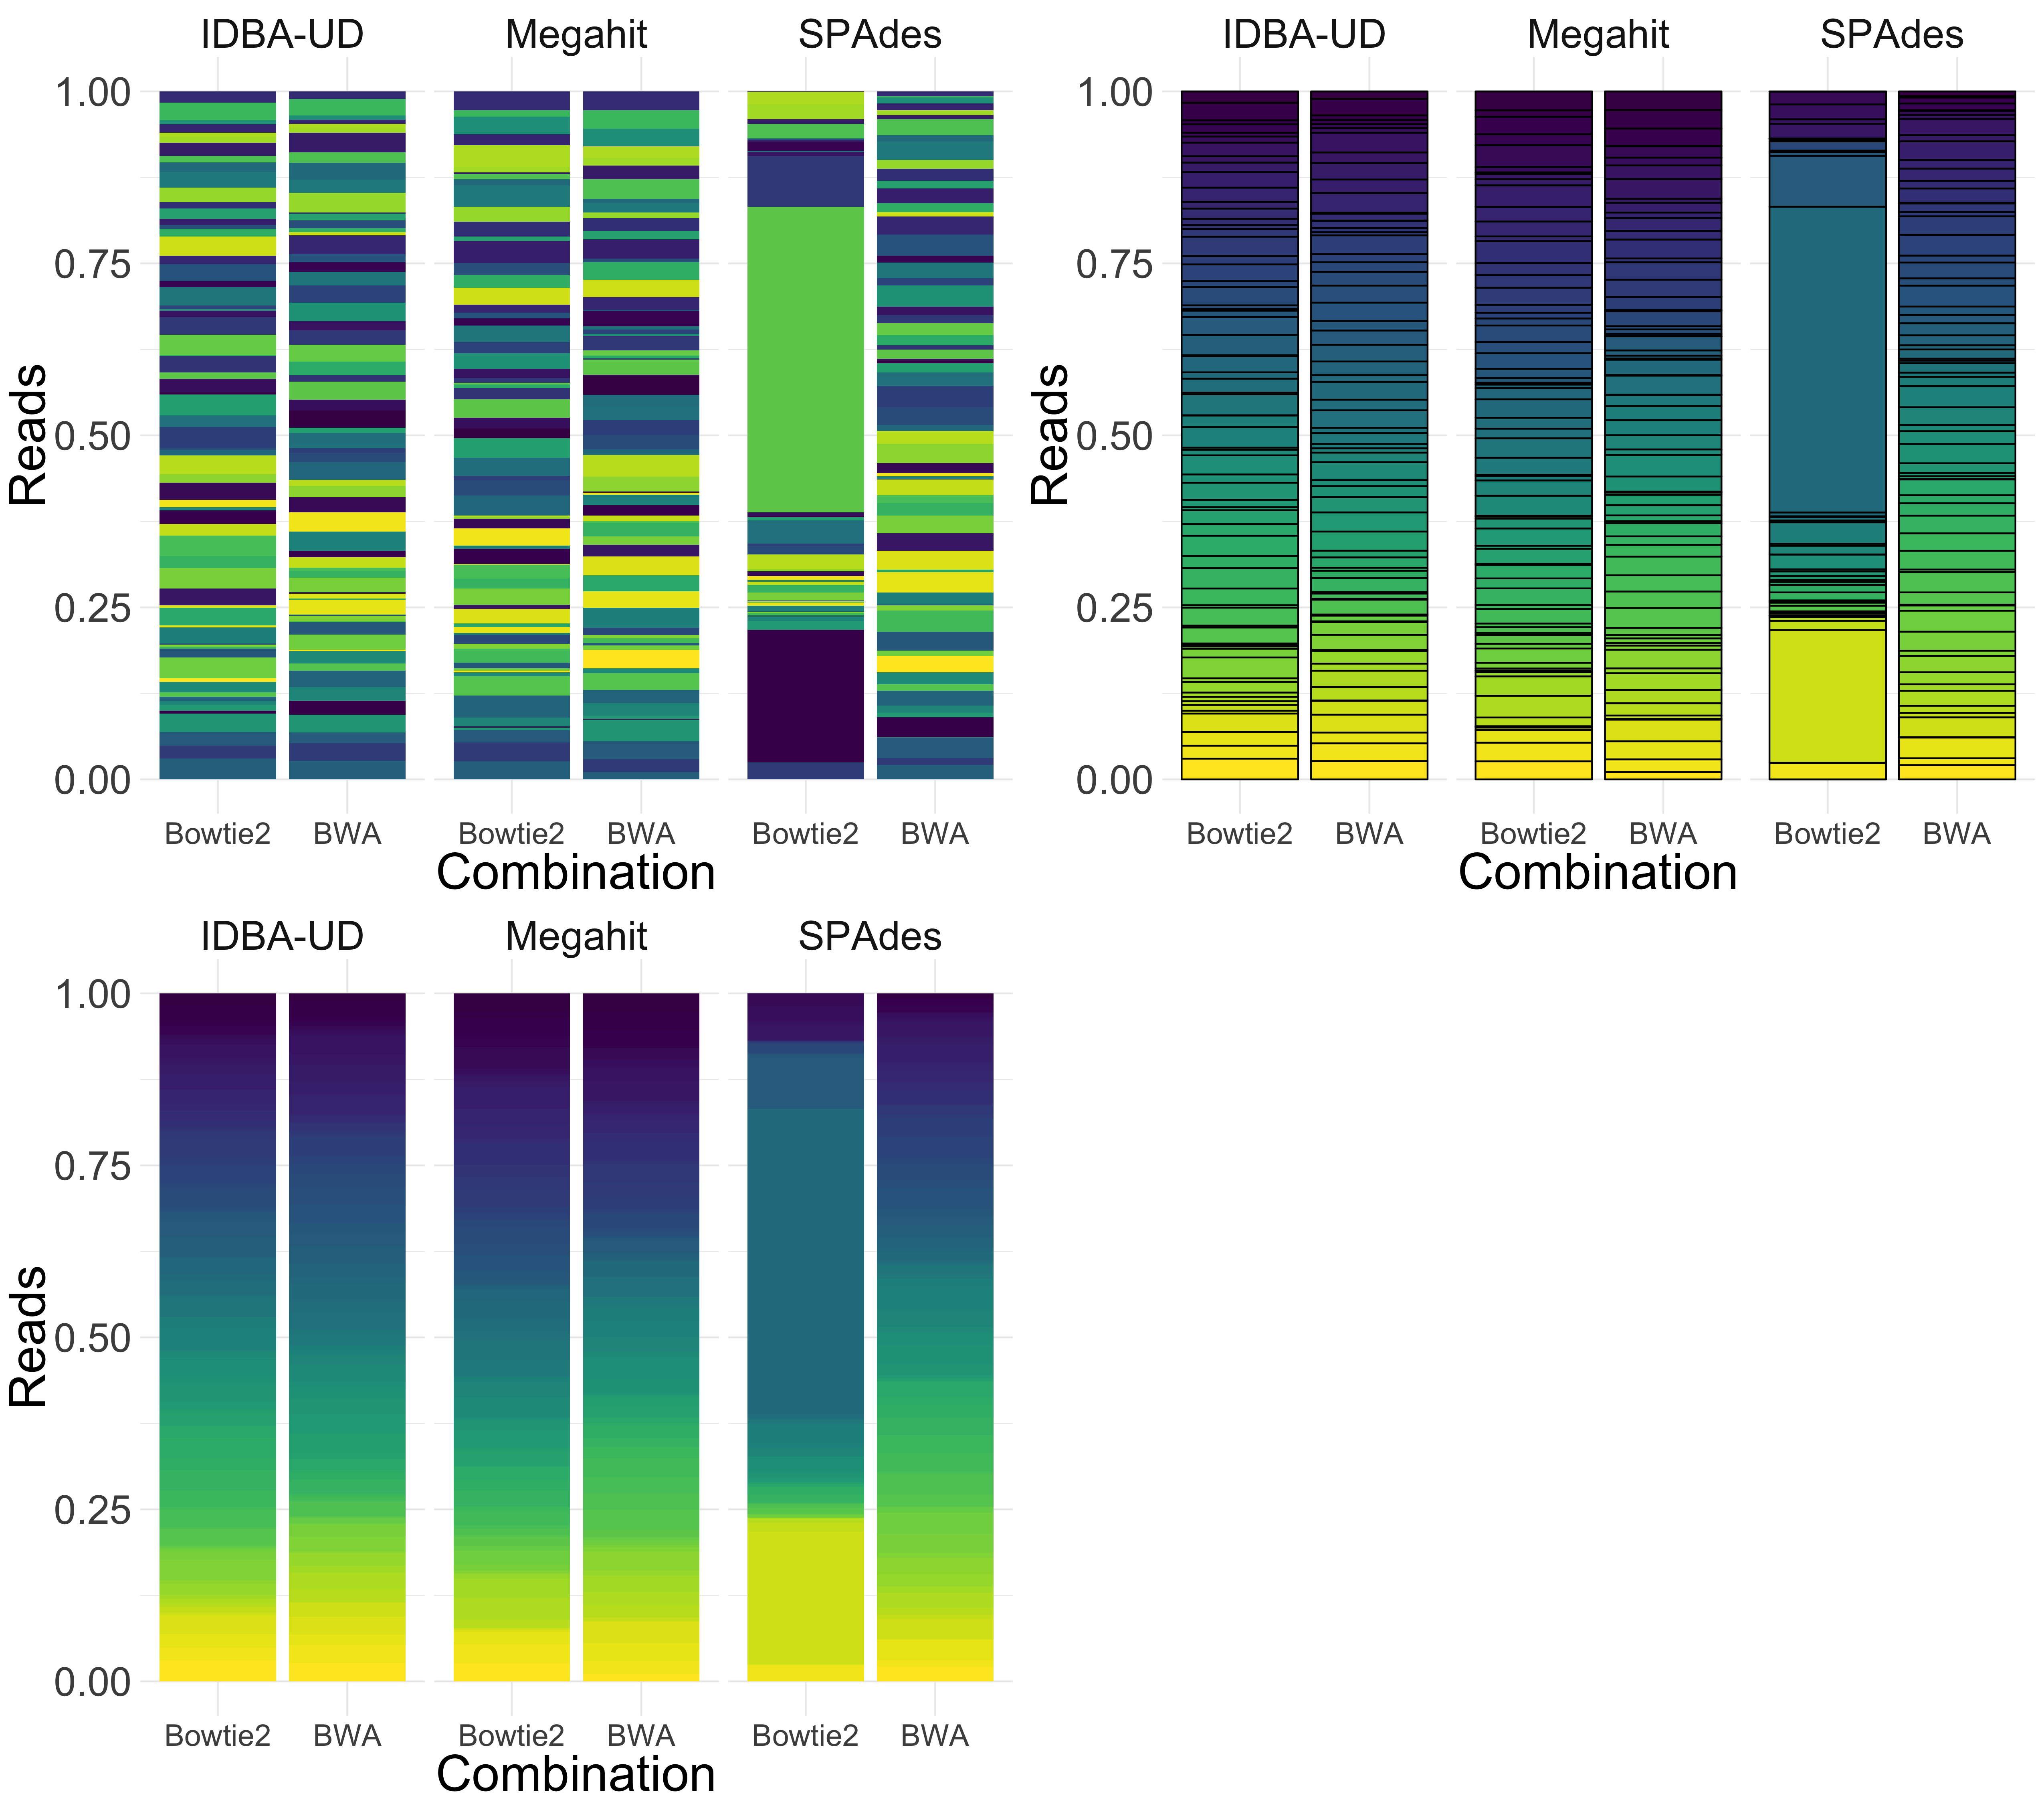

In [40]:
plot4<-ggplot(melted, aes(x = Combination, y = Reads, fill = Group))+
  geom_bar(stat = 'identity', show.legend = FALSE)+
  facet_grid(~ Category, scales = "free", space = "free")+
  theme_minimal()+
  scale_fill_manual(values=colorvec1)+
  theme(axis.text.x=element_text(size=18))+
  theme(text = element_text(size = 30))+
  theme(legend.position="none")

plot5<-ggplot(melted, aes(x = Combination, y = Reads, fill = Group))+
  geom_bar(stat = 'identity', show.legend = FALSE, colour="black")+
  facet_grid(~ Category, scales = "free", space = "free")+
  theme_minimal()+
  scale_fill_manual(values=viridis_colors)+
  theme(axis.text.x=element_text(size=18))+
  theme(text = element_text(size = 30))+
  theme(legend.position="none")

plot6<-ggplot(melted, aes(x = Combination, y = Reads, fill = Group))+
  geom_bar(stat = 'identity', show.legend = FALSE)+
  facet_grid(~ Category, scales = "free", space = "free")+
  theme_minimal()+
  scale_fill_manual(values=viridis_colors)+
  theme(axis.text.x=element_text(size=18))+
  theme(text = element_text(size = 30))+
  theme(legend.position="none")

options(repr.plot.width=17, repr.plot.height=15)
grid_plot <- grid.arrange(plot4, plot5, plot6, nrow=2, ncol = 2)
#ggsave("Plot4.png", plot=grid_plot,  device="png")  #uncomment if you want to save the plot as .png (currently wrong size, rather save it manually by right-clicking o picture)

### Soooo, which colors are prettiest??